## The formula

Different from Value iteration, policy iteration keeps track of the policy.

In every loop, it improve the estimate of the value $V$ of policy $\pi$:

$$ V^{\pi}(s_0) = \mathbb{E}[\sum_{t=0}^{\infty}\gamma^t r(s_t,s_{t+1},a^{\pi}) ]$$

$$ V^{\pi}(s_t) = \mathbb{E}[r(s_t, s_{t+1}, a^{\pi})]_{|s_t} + \gamma \int_S Prob(s_{t} | s_{t-1}, a^{\pi}) V^{\pi}(s_{t}) d s_{t}$$

Discrete action space case:

$$ V^{\pi}(s_t) = P_{s_t;a^{\pi}} R_{s_{t+1}} + \gamma P_{s_{t-1};a^{\pi}} V^{\pi}$$

Then improve the policy $\pi$:

$$ \pi(s) = argmax_a ( P_{s;a}^T R_{s'} + \gamma P_{s_{t+1};a^{\pi}}^T V^{\pi} )$$

Eventually we explicitly have optimal policy $\pi^*$

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import random
from IPython import display
import time
%matplotlib inline
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
pd.options.display.float_format = '{:20,.3f}'.format

In [12]:
env = gym.make('Taxi-v2')
# env = gym.make('FrozenLake-v0')

[2017-11-30 01:31:13,813] Making new env: Taxi-v2


## Check here for the explanation of the game: https://gym.openai.com/envs/Taxi-v1/

In [13]:
def getP(C):
    P = C/np.sum(C,axis=2)[:,:,np.newaxis]
    return(P)

In [14]:
V = np.zeros(env.observation_space.n)
C = np.zeros([env.action_space.n,env.observation_space.n,env.observation_space.n])+0.01
R = np.zeros([env.action_space.n,env.observation_space.n,env.observation_space.n])
Pi = np.random.randint(env.action_space.n,size = (env.observation_space.n))
P = getP(C)
# P = np.zeros([env.observation_space.n,env.observation_space.n,])+1/(env.observation_space.n)

In [15]:
episodeMax = 250
gamma = 0.99
done = False
weight = 0.95

rList = []
avgRList = []
flag = True

for episode in range(episodeMax):
    state = env.reset()
    done = False
    while not done:
        statePre = state
        a = Pi[statePre]
        state,reward,done,info = env.step(a)
        R[a,statePre,state] =  R[a,statePre,state]*(1-weight) + reward*weight
        C[a,statePre,state] += 1
        P = getP(C)
        
        # evaluate the current policy
        V[statePre] = V[statePre]*(1-weight)+(weight)*np.dot(P[a,statePre,:],(R[a,statePre,:]+V*gamma).T)
        
        # improve policy
#         QBest = V
        Qsa =np.einsum('ijk,ijk->ji',P[:,:,:],R[:,:,:]+V[np.newaxis,np.newaxis,:]*gamma)
        Pi = np.argmax(Qsa+0.05*np.random.rand(env.observation_space.n,env.action_space.n),axis = 1)
        
    if done:
        rList.append(reward)
    
    if episode >100: #compute the average score after certain episodes
        avgR = sum(rList[-100:])/100
        avgRList.append(avgR)
        #if the average score of last 100 episode is greater than benchmark
        # 9.7 for taxi and 0.7 for frozen lake
        if avgR>9.7 and flag: 
            flag = False
            print(episode)

101


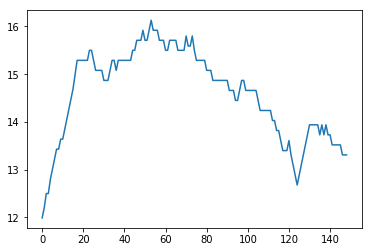

In [16]:
plt.plot(avgRList)

In [17]:
env.close()